## Задача
**Проверить гипотезы:**
1. Количество детей влияет на возврат кредита в срок.
2. Между семейным положением и возвратом кредита в срок существует зависимость.
3. Уровень дохода влияет на возврат кредита в срок.
4. Существует зависимость между целью кредита и его возвратом в срок.

**Значения столбцов, согласно документации:**

- **children — количество детей в семье;**
- days_employed — общий трудовой стаж в днях;
- dob_years — возраст клиента в годах;
- education — уровень образования клиента;
- education_id — идентификатор уровня образования;
- **family_status — семейное положение;**
- family_status_id — идентификатор семейного положения;
- gender — пол клиента;
- income_type — тип занятости;
- **debt — имел ли задолженность по возврату кредитов;**
- **total_income — ежемесячный доход;**
- **purpose — цель получения кредита.**

Жирным выделены столбцы задействованные в гипотезах

## Загрузка и обзор данных

In [1]:
import numpy as np
import pandas as pd

clients = pd.read_csv('data.csv')

clients.head(5)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу


In [2]:
clients.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Общая информация о данных
- 12 столбцов
- 21525 строк
- типы данных: int64, float64, object
- пропуски данных в столбцах days_employed и total_income

**Типы данных**
1. Количественные
    - children - int64;
    - days_employed - float64;
    - dob_years - int64;
    - total_income - float64;
2. Категориальные
    - education - object;
    - education_id - int64 (идентификатор уровня образования);
    - family_status - object;
    - family_status_id - int64 (идентификатор семейного положения);
    - gender - object;
    - income_type - object;
    - debt - int64 (предположительно идентификатор наличия задолженности);
    - purpose - object.

**Удалю индикаторы, дублирующие информацию**

In [3]:
clients.drop(['education_id', 'family_status_id'], axis=1, inplace=True)
clients.head(5)

,children,days_employed,dob_years,education,family_status,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,женат / замужем,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,женат / замужем,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,женат / замужем,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,женат / замужем,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,гражданский брак,F,пенсионер,0,158616.077870,сыграть свадьбу


## Подробнее рассмотрю значения столбцов, задействованных в гипотезах

### children

In [4]:
sorted(clients['children'].unique())

[-1, 0, 1, 2, 3, 4, 5, 20]

- Количество детей не может быть -1
- 20 детей выбивается из выборки, но возможно

Посмотрю количество всех значений

In [5]:
clients['children'].value_counts()

 0     14149
 1      4818
 2      2055
 3       330
 20       76
-1        47
 4        41
 5         9
Name: children, dtype: int64

Значения -1 и 20 представляют небольшую долю от общего количества. Можно замнить их медианой количества детей в соответствующей возрастной категории

In [6]:
print('Средний возраст клиента с -1 ребенком:',\
    clients[clients['children'] == -1]['dob_years'].mean())
print('Средний возраст клиента с 20 детьми:',\
    clients[clients['children'] == 20]['dob_years'].mean())

Средний возраст клиента с -1 ребенком: 42.57446808510638
Средний возраст клиента с 20 детьми: 41.81578947368421


Раздница между возрастными категориями не значительна, возьму моду количества детей по клиентам возрастом 42 года 

In [7]:
clients[clients['dob_years'] == 42]['children'].median()

0.0

Медиана = 0, заменяю значения на 0

In [8]:
clients.loc[(clients['children'] == -1) | (clients['children'] == 20), 'children'] = 0

sorted(clients['children'].unique())

[0, 1, 2, 3, 4, 5]

### family_status

In [9]:
clients['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'Не женат / не замужем'], dtype=object)

In [10]:
clients['family_status'].value_counts()

женат / замужем          12380
гражданский брак          4177
Не женат / не замужем     2813
в разводе                 1195
вдовец / вдова             960
Name: family_status, dtype: int64

Данные в столбце не содержат аномалий и пропусков, имеют 5 значений. Есть символы в верхнем регистре, приведу к нижнему.

In [11]:
clients['family_status'] = clients['family_status'].str.lower()

clients['family_status'].unique()

array(['женат / замужем', 'гражданский брак', 'вдовец / вдова',
       'в разводе', 'не женат / не замужем'], dtype=object)

### debt

In [12]:
clients['debt'].value_counts()

0    19784
1     1741
Name: debt, dtype: int64

Судя по распределению индикатора задолжностей:
- 0 - нет задолжностей
- 1 - есть

### total_income

Столбец total_income имеет пропуски в данных

In [13]:
clients['total_income'].isna().sum()

2174

Доля пропусков - 10%

Пропуски заменю медианой по соответствующему типу занятости, приведу все данные к типу int64

In [14]:
clients['total_income'] = clients['total_income'].fillna(clients.groupby('income_type')['total_income'].transform('median'))

In [15]:
clients['total_income'] = clients['total_income'].astype('int64')

In [16]:
clients['total_income'].isna().sum()

0

Пропуски заполнены

Для проверки гипотезы 3 удобнее будет разделить клиентов на группы по уровню дохода
- 250001 и выше - A
- 150001 - 250000 - B
- 50001 - 150000 - C
- 0-50000 - D

In [17]:
clients['group_income'] = clients['total_income']\
    .apply(lambda x: 'A' if x > 250000 \
        else ('B' if 250001 > x > 150000 \
            else ('C' if 150001 > x > 50000 \
                else 'D')))

In [18]:
clients['group_income'].value_counts()

C    11313
B     7027
A     2813
D      372
Name: group_income, dtype: int64

### purpose

In [19]:
clients['purpose'].unique()

array(['покупка жилья', 'приобретение автомобиля',
       'дополнительное образование', 'сыграть свадьбу',
       'операции с жильем', 'образование', 'на проведение свадьбы',
       'покупка жилья для семьи', 'покупка недвижимости',
       'покупка коммерческой недвижимости', 'покупка жилой недвижимости',
       'строительство собственной недвижимости', 'недвижимость',
       'строительство недвижимости', 'на покупку подержанного автомобиля',
       'на покупку своего автомобиля',
       'операции с коммерческой недвижимостью',
       'строительство жилой недвижимости', 'жилье',
       'операции со своей недвижимостью', 'автомобили',
       'заняться образованием', 'сделка с подержанным автомобилем',
       'получение образования', 'автомобиль', 'свадьба',
       'получение дополнительного образования', 'покупка своего жилья',
       'операции с недвижимостью', 'получение высшего образования',
       'свой автомобиль', 'сделка с автомобилем',
       'профильное образование', 'высшее об

Многие цели схожи по смыслу. Выделю основные группы:
- Недвижимость
- Авто
- Образование
- Свадьба

In [20]:
clients['purpose'] = clients['purpose'].apply(lambda x: 'недвижимость' if x.find('недвиж') != -1 else x)
clients['purpose'] = clients['purpose'].apply(lambda x: 'недвижимость' if x.find('жиль') != -1 else x)
clients['purpose'] = clients['purpose'].apply(lambda x: 'авто' if x.find('авто') != -1 else x)
clients['purpose'] = clients['purpose'].apply(lambda x: 'образование' if x.find('образован') != -1 else x)
clients['purpose'] = clients['purpose'].apply(lambda x: 'свадьба' if x.find('свадь') != -1 else x)

In [21]:
clients['purpose'].value_counts()

недвижимость    10840
авто             4315
образование      4022
свадьба          2348
Name: purpose, dtype: int64

### Удаление дублей

In [22]:
clients.duplicated().sum()

343

In [23]:
clients.drop_duplicates(inplace=True)
clients.duplicated().sum()

0

Удалено 343 полных дубля

**Данные, необходимые для проверки гипотез подготовлены**


## Проверка гипотез

### Количество детей влияет на возврат кредита в срок

In [24]:
children_pivot = clients.pivot_table(index='children',\
    columns='debt',\
        values='days_employed',\
            aggfunc='count')

children_pivot

debt,0,1
children,,
0,11860.0,961.0
1,3935.0,408.0
2,1674.0,177.0
3,272.0,22.0
4,31.0,3.0
5,8.0,NaN


Избавлюсь от NaN

In [25]:
children_pivot.fillna(0, inplace=True)

Добавлю процентный столбец

In [26]:
children_pivot['percent'] = round((children_pivot[1] / (children_pivot[1] + children_pivot[0])) * 100, 2)

children_pivot

debt,0,1,percent
children,,,
0,11860.0,961.0,7.50
1,3935.0,408.0,9.39
2,1674.0,177.0,9.56
3,272.0,22.0,7.48
4,31.0,3.0,8.82
5,8.0,0.0,0.00


Для получния 90% точности при 5% погрешности необходимый размер выборки равен 270. Количество клиентов с 4 и 5 детьми не удовлетворяют условию

Рассмотрю клиентов с 0-3 детьми

In [27]:
children_pivot = children_pivot[0:4]

<AxesSubplot:xlabel='children'>

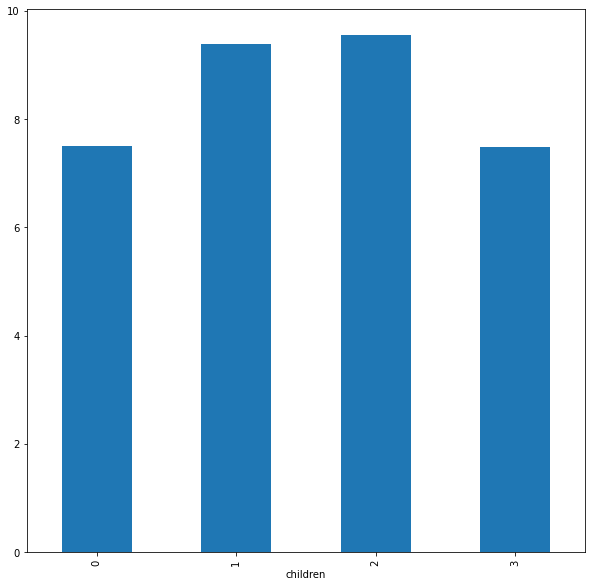

In [28]:
children_pivot['percent'].plot(kind='bar', figsize=(10,10))

### Вывод:
**Количество детей влияет на возврат кредита. Клиенты с 0 и 3 детьми обладают лучшей платежной дисциплиной, чем клиенты с 2 и 3 детьми**

### Между семейным положением и возвратом кредита в срок существует зависимость

In [29]:
family_pivot = clients.pivot_table(index='family_status',\
    columns='debt',\
        values='days_employed',\
            aggfunc='count')

family_pivot

debt,0,1
family_status,,
в разводе,1007,76
вдовец / вдова,809,56
гражданский брак,3396,339
женат / замужем,10297,846
не женат / не замужем,2271,254


Добавлю процентный столбец

In [30]:
family_pivot['percent'] = round((family_pivot[1] / (family_pivot[1] + family_pivot[0])) * 100, 2)

family_pivot = family_pivot.sort_values('percent')
family_pivot

debt,0,1,percent
family_status,,,
вдовец / вдова,809,56,6.47
в разводе,1007,76,7.02
женат / замужем,10297,846,7.59
гражданский брак,3396,339,9.08
не женат / не замужем,2271,254,10.06


<AxesSubplot:ylabel='family_status'>

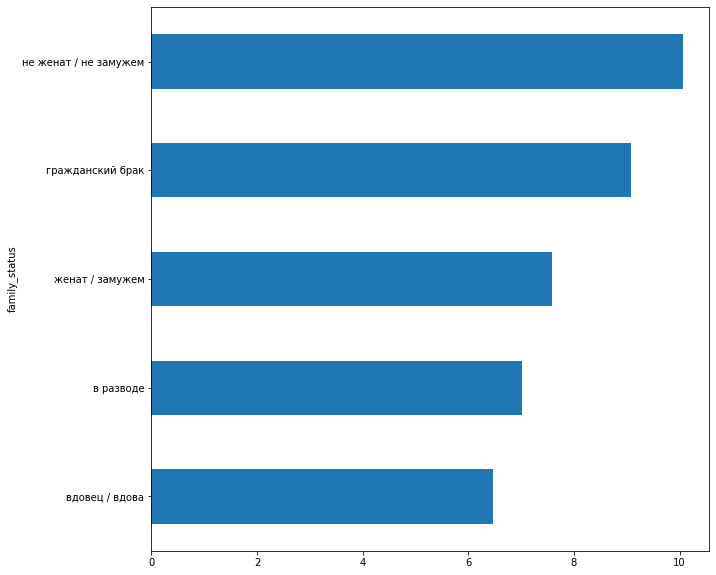

In [31]:
family_pivot['percent'].plot(kind='barh', figsize=(10,10))

### Вывод:
**Существует зависимость между семейным положением и возвратом кредита. Категории в порядке увеличения процента невозврата:**
1. **Вдовец/вдова - 6.47%**
2. **В разводе - 7.02%**
3. **Женат/замужем - 7.59%**
4. **Гражданский брак - 9.08%**
5. **Не женат/не замужем - 10.06%**

### Уровень дохода влияет на возврат кредита в срок

In [32]:
income_pivot = clients.pivot_table(index='group_income',\
    columns='debt',\
        values='days_employed',\
            aggfunc='count')

income_pivot

debt,0,1
group_income,,
A,2618,194
B,5840,532
C,8973,822
D,349,23


In [33]:
income_pivot['percent'] = round((income_pivot[1] / (income_pivot[1] + income_pivot[0])) * 100, 2)

income_pivot

debt,0,1,percent
group_income,,,
A,2618,194,6.90
B,5840,532,8.35
C,8973,822,8.39
D,349,23,6.18


<AxesSubplot:xlabel='group_income'>

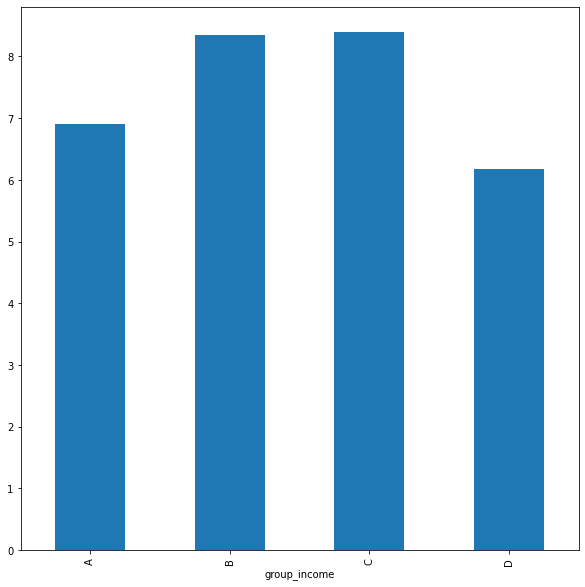

In [39]:
income_pivot['percent'].plot(kind='bar', figsize=(10,10))

### Вывод:
**Уровень дохода влияет на возврат кредита. Процент невозврата у средних категорий B и C выше, чем у наиболее состоятельной A и наименее состоятельной D**

### Существует зависимость между целью кредита и его возвратом в срок

In [35]:
purpose_pivot = clients.pivot_table(index='purpose',\
    columns='debt',\
        values='days_employed',\
            aggfunc='count')

purpose_pivot

debt,0,1
purpose,,
авто,3530,367
недвижимость,9043,715
образование,3266,331
свадьба,1941,158


In [36]:
purpose_pivot['percent'] = round((purpose_pivot[1] / (purpose_pivot[1] + purpose_pivot[0])) * 100, 2)

purpose_pivot = purpose_pivot.sort_values('percent')
purpose_pivot

debt,0,1,percent
purpose,,,
недвижимость,9043,715,7.33
свадьба,1941,158,7.53
образование,3266,331,9.20
авто,3530,367,9.42


<AxesSubplot:ylabel='purpose'>

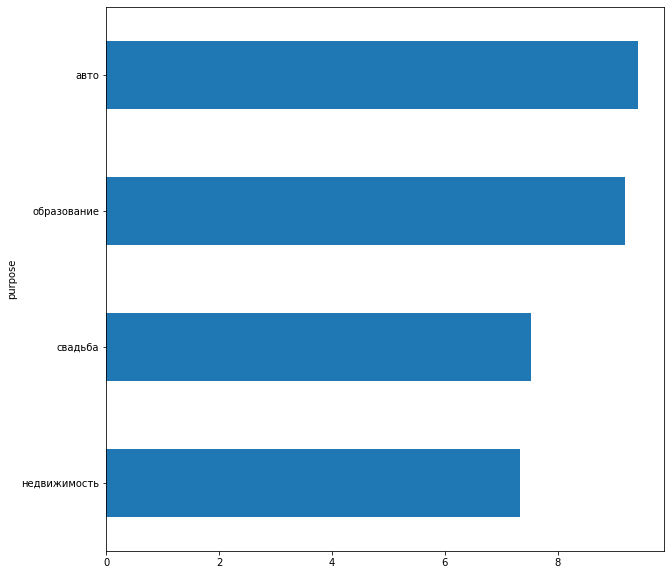

In [40]:
purpose_pivot['percent'].plot(kind='barh', figsize=(10,10))

### Вывод:
**Существует зависимость между целью кредита и его возвратом. Категории в порядке увеличения процента невозврата:**
1. **Недвижимость - 7.33%**
2. **Свадьба - 7.53%**
3. **Образование - 9.20%**
4. **Авто - 9.42%**